
# Configurações iniciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train = pd.read_csv("regression_train.csv")
test = pd.read_csv("regression_test.csv")

In [3]:
train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [4]:
train.tail()

,target,X1,X2,X3,X4,X5,X6,X7
1037,4296.426459,5.375810,6.937947,55.810467,1.698025,-65.819509,8,16.304176
1038,54.530919,0.619207,-1.925819,48.168606,1.357223,-65.385243,8,-4.525675
1039,1636.535078,4.548172,2.886253,47.775525,1.278439,-56.312543,8,6.782694
1040,NaN,1.806045,-3.015213,48.352707,4.627906,-57.722688,5,-7.085751
1041,2951.647675,6.002320,5.760220,41.926049,3.562797,-81.111346,8,13.536516


In [5]:
#Numero de linhas e colunas de treino
print(f'Número de linhas ou variaveis {train.shape[0]}')
print(f'Número de entradas ou colunas {train.shape[1]}')

Número de linhas ou variaveis 1042
Número de entradas ou colunas 8


# Preparação dos dados


#### Verificação dos valores ausentes




A primeira coisa que tem que saber quando lida com um conjunto de dados novos, é a quantidade e proporção dos missing values.

Para identificar valores ausentes, por colunas, você pode usar:

**.isnull().sum()** para retornar a soma dos valores nulos encontrados

Será utilizada o retorno da soma e usaremos essa informação para apresentar de forma percentual.

In [6]:
train.isnull().sum()

target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

Percebems que de fato a target tem 327 valores ausentes e a X2 possui apenas 11 valores ausentes.

Para entender quanto esse número de valores ausentes nas duas colunas representa percentualmente em relação ao nosso dataset iremos realizar a seguinte ação:

In [7]:
# ver a porcentagem de valores ausentes 
train.isnull().sum() / train.shape[0]

target    0.313820
X1        0.000000
X2        0.010557
X3        0.000000
X4        0.000000
X5        0.000000
X6        0.000000
X7        0.000000
dtype: float64

Conseguimos concluir que as 327 entradas de valores ausentes da target representam aproximadamente 31% do dataset. E as 11 entrdas de valores ausentes da x2 representam aproximadamente 1% do dataset.

Lidando com dados ausentes

Possibilidades de ações:


*   Excluir valores ausentes - decisão mais radical, e deve ser feita apenas em casos onde não haverá impacto significativo no modelo.
 
*   Preencher valores ausentes 
    *   mediana da coluna - abordagem direta e simples consiste em substituir os NaN pela mediana da coluna

    *   frequência da coluna - o valor mais frequente da coluna, interessante com variáveis categóricas

    *   média da coluna - preenchido os valores ausentes com a média de todos os valores presentes na coluna




Será adotado o preenchimento com a mediana, porque a média tende a ter maior chance pode sofrer inviesamento e isso não é interessante para nosso modelo de machine learning.  

A **target** temos 31% de valores ausentes, geralmente não é feito preenchimento dos valores ausentes nessa situação, desse modo vai ser excluido os valores ausentes da mesma.

Já em relação os valores da feature **X2** que possui apenas 1% do dataset será feito o preenchimento com mediana.



#### Verificação dos valores numéricos


Para saber se o conjunto de dados é configurado em valores númericos corretos é usado o seguinte recurso:

**.info()** para dar um resumo dos valores 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


É notado que todas as features e inclusive nossa variável alvo estão com tipo de dados correto, então não é preciso realizar nenhuma modificação no conjunto de dados nessa etapa

#### Verificação de outliers


Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

É decidido adotar as seguintes estratégias, sendo consideradas simples, todavia eficientes para identificar a existência de outliers.:


*   O `Boxplot` porque o mesmo indicar explicitamente quando os conjuntos de dados contêm valores discrepantes.


*   O `IQR Scores` para definir os limites superiores e inferiores de cada variável suspeita, com a finalidade de identificar os outliers, e caso necessário definir com facilidade o corte e remover os outliers.

 


Já em relação as demais estratégias não adotadas, segue a justificativa:

*   O `Scatter plots` exibe gráfico de dispersão para detectar valores discrepantes em uma configuração multivariada. Todavia queremos necesse momento do problema é necessitado ter visão univariada para identificar os valores discrepantes, por isso que é utilizado o `Boxplot`.

*   O `Z-Score` é quantificar a inusitabilidade de uma observação quando seus dados seguem a distribuição normal e quando o número de desvios padrão acima e abaixo da média em que cada valor cai. Por exemplo,  um escore Z de -2 significa que está dois desvios padrão abaixo da média. Um Z-score de zero representa um valor que é igual à média. **É uma estratégia interessante, todavia para esse tipo de problema não fornece informações mais detalhadas para definir por exemplo recorte e remoção de determinados outliers.**






Vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, valor min e o valor máximo estão distantes (discrepantes).

In [9]:
train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,1042.000000,1031.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1593.201095,3.182976,4.426286,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,230.632308,0.170590,-3.307931,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,808.374368,2.508671,-0.461150,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1849.754221,4.540218,2.406651,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


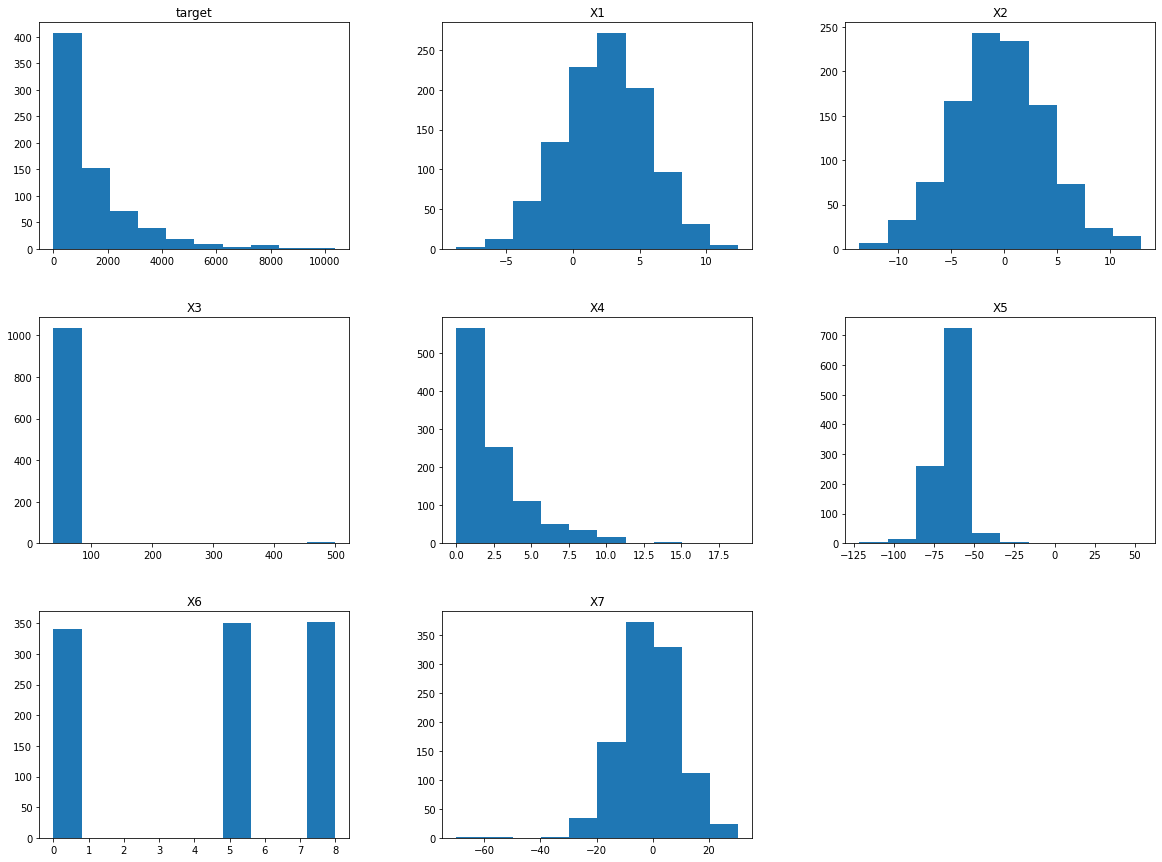

In [10]:
# verificando as distribuições
train.hist(figsize=(20,15), grid=False);

**Há outliers?**

Por meio do recurso `describe` é possível ter a liberdade de informar que possivelemnte a `target`, `X4` e `X5`podem estarem como as features que possuem mais representatividade de outliers.

E com o uso da distribuição do histograma fica evidente a presença de *outliers*.


Todavia, com intuito de comprovar de fato a situação do dataset quanto a outliers será utilizado as duas estratégias de identificar outliers mencionadas anteriormente que são: `boxplot`e `IQR Scores`.

Depois de realizar as duas estratégias foram adquiridas as seguintes informações:

In [11]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_target = train.target.quantile(.25)
q3_target = train.target.quantile(.75)
iqr_target = q3_target - q1_target
print ("O IQR da área media é: ", iqr_target)

# definindo os limites superior e inferior da variável
sup_target = q3_target + 1.5 * iqr_target
inf_target = q1_target - 1.5 * iqr_target

print ("O limite superior é: ", sup_target)
print ("O limite inferior é: ", inf_target)

O IQR da área media é:  1619.1219132636531
O limite superior é:  4278.437091132932
O limite inferior é:  -2198.05056192168


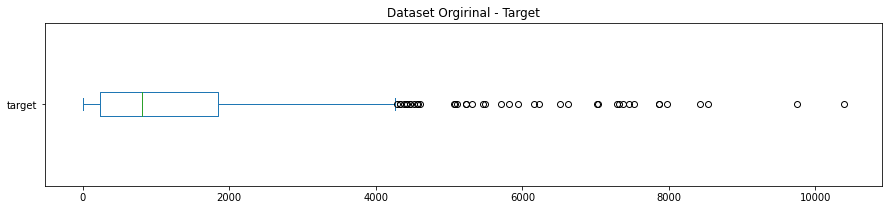

 O dataset possui 1042 entradas
 41 Entradas acima de 4278.437
 Representam 3.93% do dataset


In [12]:

# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
train.target.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Target')
plt.show()
print(" O dataset possui {} entradas".format(train.shape[0]))
print(" {} Entradas acima de 4278.437".format(len(train[train.target > 4278.437091132932])))
print(" Representam {:.2f}% do dataset".format((len(train[train.target > 4278.437091132932]) / train.shape[0])*100))

Foi realizado o mesmo processo para todas as variáveis do dataset, e o resultado é exibido a seguir de maneira decrescente em termos de percentual do outliers no dataset:



*   `X4`: 62 Entradas acima de 7.3961 representam **5.95%** do dataset

*   `X5`: 27 Entradas acima de -49.279142 representam **2.59%** do dataset e 34 Entradas abaixo de -81.03512228645889 que epresentam 3.26% do dataset, possuindo no total 61 entradas consideradas outliers que representam **5.85%** do dataset

*   `target`: 41 Entradas acima de 4278.437 representam **3.93%** do dataset

*   `X2`: 10 Entradas acima de 10.978 representam **0.96%** do dataset

*   `X7`: 8 Entradas acima de 25.893699 representam **0.77%** do dataset

*   `X3`: 7 Entradas acima de 61.05510 representam **0.67%** do dataset

*   `X1`: 3 Entradas acima de 11.094 representam **0.29%** do dataset

*   `X6`: 0 Entradas acima de 20.0 representam **0.00%** do dataset


**E agora, removemos todos os outliers do dataset?**

É decidido não ser removido os outliers encontrados, porque entende-se que as representatividades encontradas são consideráveis, e podem permanecer.

Mas qual é o impacto dessa permanecia dos outliers para o modelo de machine learning?

Para responder tal perguntam é necessário realizar alguns teste nos modelos escolhido para este tipo de problema, e por meio da testagem realizar conclusões.

#### Verificação de duplicatas

In [13]:
train.duplicated().sum()

0

# Análise Exploratória


## Exploração estatística descritiva univariada


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


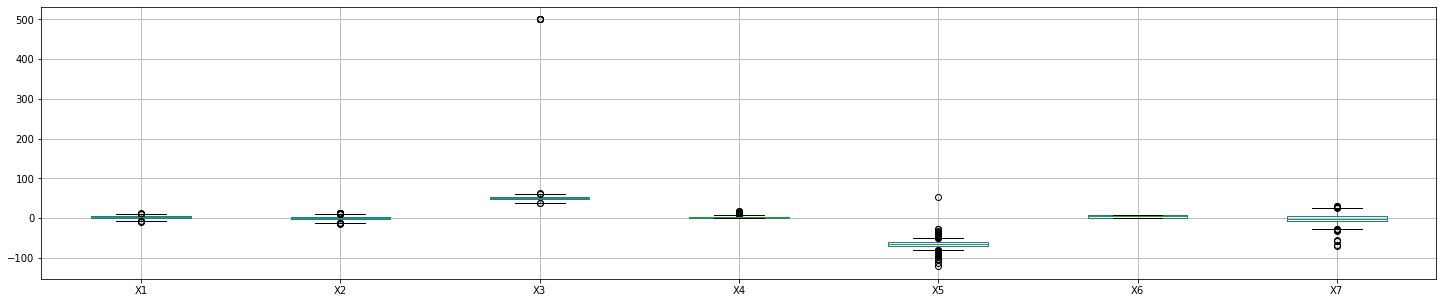

In [14]:
train.drop(columns=['target']).boxplot(figsize=(25,5))
plt.show()

De ínicio verificamos que os dados presentes em cada feature estão em escalas semelhantes, e é interessante porque não será preciso preocupa-se com a normalização dos dados na etapa do modelo de machine learning.

## Exploração estatística descritiva multivariada


Agora vamos ter um primeiro entendimento das variaveis que possivelmente se correlacionam e impactam na target. Encontrar essas variáveis é de extrema importância para quando formos construir o nosso modelo.

Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. 

Então, estamos interessados em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

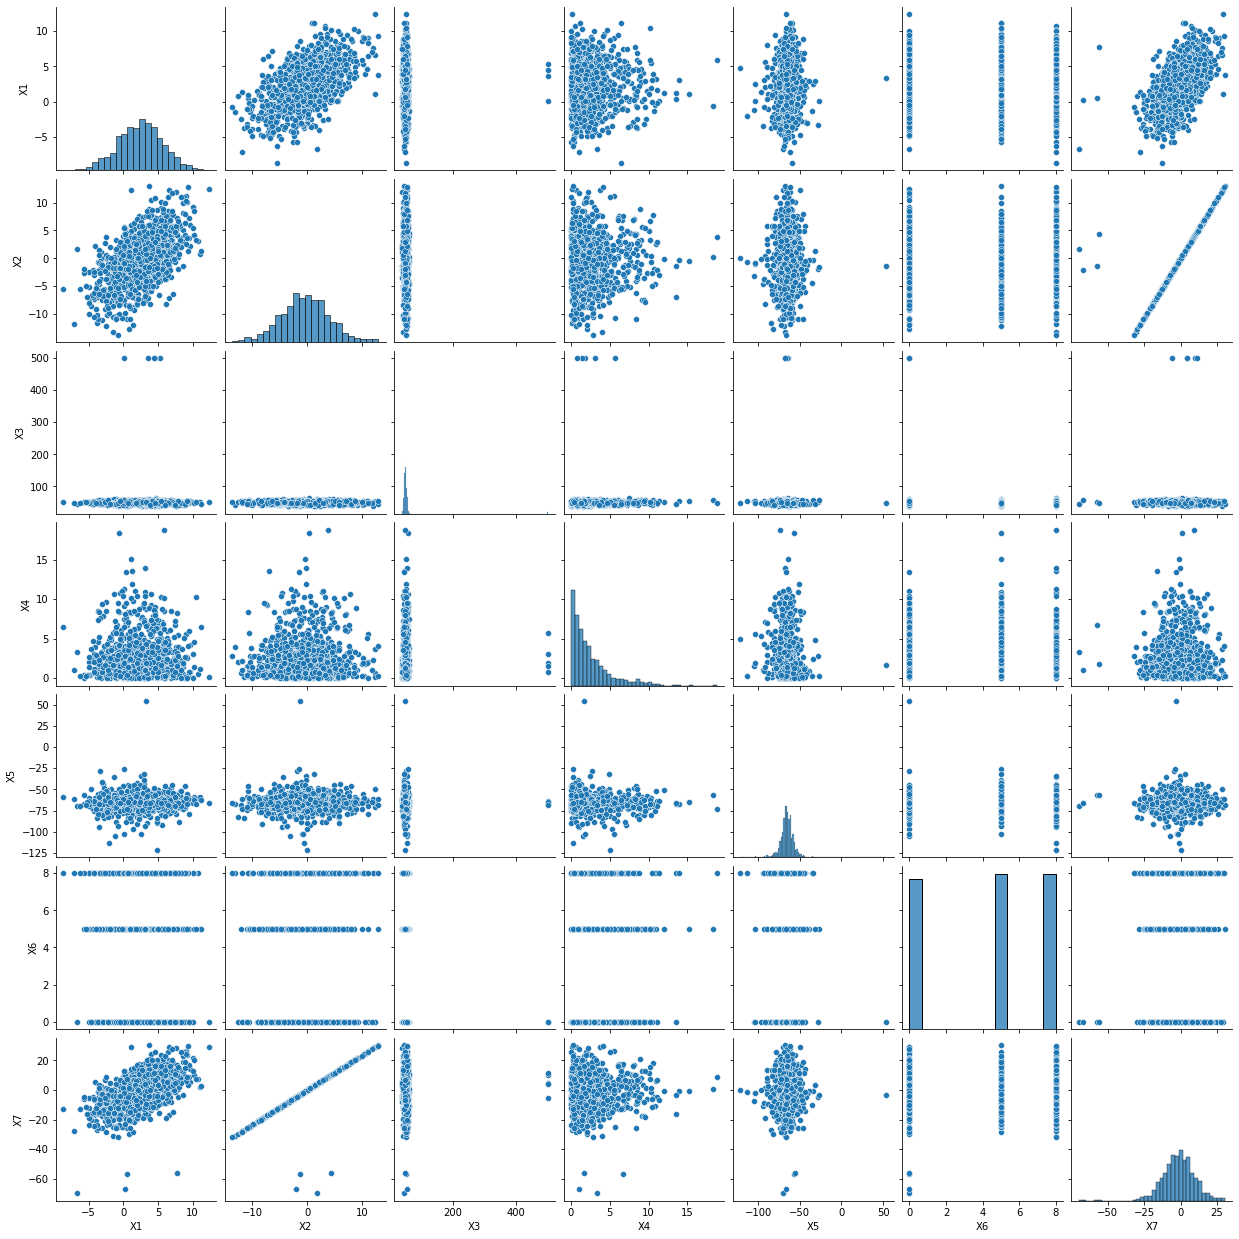

In [15]:
## GRÁFICO PARA ANALISAR A RELAÇÃO ENTRE AS VARIÁVEIS
sns.pairplot(train.drop(columns=['target']))
plt.show()

Pelo gráfico exibido anteriomente é possível compreender quais variáveis tem alta correlação entre as mesmas.  
É percebido que as variáveis tem alta correção entre as mesmas.

E isso é bom para o modelo de machine learning?

Concerteza não, a existência de variáveis com alta relação possibilita que o nosso modelo sofra enviesado por causa dessa alta relação.


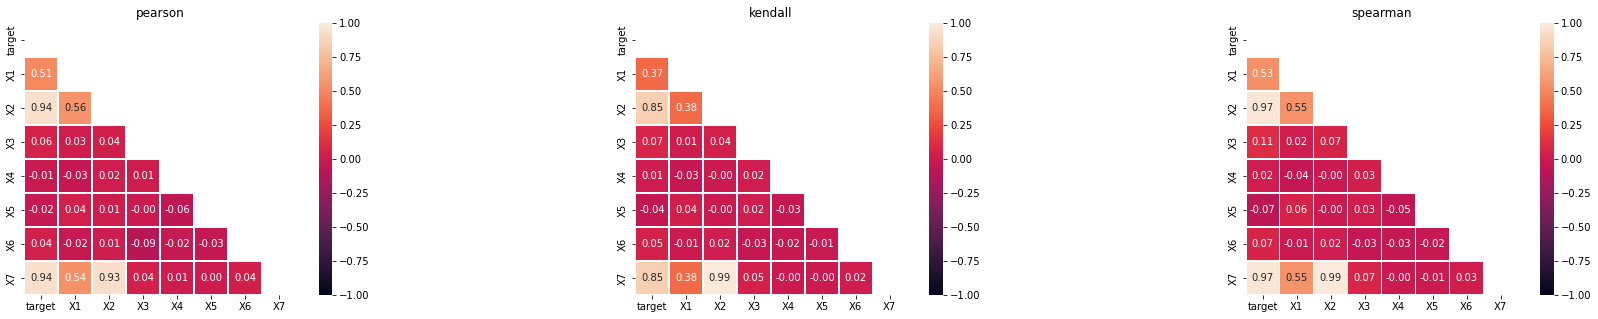

In [16]:
fig, axs = plt.subplots(1,3, figsize=(30, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr     = train.corr()
kendall  = train.corr('kendall')
spearman = train.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

plt.show()

O mapa de calor impresso acima contém valores correlatos que pertencem a nossa variável target diagnosis.

Os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).


Podemos observar que na diagonal, os quadrados representam a correlação das variáveis, e foi identificado que existem algumas variaríeis que possui uma forte correlação com outras variáveis, e inclusive com nossa variável alvo que é o diagnóstico. Esse cenário para identificar que nosso futuro modelo de machine learning vai ser enviesado por causa dessa correção elevada que gerar redundância informacional. 

Explicando o uso dos coeficientes de correlação: 

*   `Pearson`: usado para detectar a correlação entre duas variáveis quantitativas, de preferência contínuas.

*   `Spearman`: usado quando não existe normalidade ou não existe relação linear entre as variáveis. Podendo ser aplicado a variáveis continuas ou ordinais.

*   `Kendall`: usado como correlação de ranques e verifica se existe correlação entre duas variáveis ordinais. E também é usada quando não existe normalidade ou não existe relação linear entre as variáveis.

Qual se olhar as definições dos respectivos coeficientes de correlação é decidido utilizar o `Pearson` para olhar a correlação existente nas variáveis do dataset, que existe relação de linealidade entre as variáveis continuas do nosso dataset.

Assim sendo, segue a lista de variáveis que precisam ser excluídas do nosso dataset, ao observarmos apenas o coeficiene de correlação `Pearson`:

*   x2
*   x7

As variáveis que sobraram possui nível de correlação com as outras aceitável, e isso é verificado porque o nível de correlação das mesmas é entre 0,03 à 0.60. Segue a lista de variáveis que serão utilizadas no modelo de machine learning:

*   x1	
*   x3
*   x4
*   x5
*   x6

# Modelagem

Dentre os algoritmos populares que podem ser utilizadas para o modelo de machine learning que é de classificação binária, foi tomada a decisão de usar para o problema os seguintes modelos de machine learning:

*   `Linear Regression`
*   `Decision Tree`
*   `Random Forest`

**A justificativa de tal escolha é:**

*   `Linear Regression` 
    *  A regressão linear é simples de implementar.
    *  Menos complexidade em comparação com outros algoritmos

*   `Decision Trees`
    *    Fácil de entender e interpretar, visualmente intuitivo.
    *    Pode trabalhar com recursos numéricos e categóricos.
    *    Requer pouco pré-processamento de dados: não há necessidade de codificação one-hot, variáveis ​​fictícias, etc

*   `Random Forest`
    *    O uso de conjuntos de floresta aleatória maiores para obter um desempenho mais alto.
    *    Muito fácil de interpretar e entender
    *    É um dos modelos mais utilizados do mundo para atingir performances muito boas sem precisar de muito tempo para ajustar parâmetros.

**E qual foram os algoritmos não escolhidos para tal problema do cenário? E porque não foram escolhidos?**

*   `Lasso Regression`
    *   O lasso selecionará apenas um recurso de um grupo de recursos correlacionados
    *   As características selecionadas podem ser altamente tendenciosas, nesse modelo.

*   `Neural Network Regression`

    *  Ciente do poder das redes neurais em fazer previsões/suposições. Cada nó em uma rede neural possui uma respectiva função de ativação que define a saída do nó com base em um conjunto de entradas. Todavia, acredita-se que o problema não tem alta maguinitude para necessitar de uma rede neural para modelagem.


Métricas para avaliação de modelo de regressão:

*   `R2 Score`: Ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas provavelmente serão previstas pelo modelo.

*   `MAE`: O erro absoluto médio (MAE) é a métrica de erro todos os erros absolutos de previsão,seria a distância vertical entre o valor previsto (valores na linha de regressão) e o valor real. 

*   `MSE`: O erro quadrático médio (MSE) é como o MAE, mas eleva ao quadrado a diferença antes de somar todos eles em vez de usar o valor absoluto. O efeito do termo quadrado na equação MSE é mais aparente com a presença de outliers em nossos dados.

*   `RMSE`: o erro quadrático médio da raiz, comumente usada em problemas de regressão e informa o desempenho do seu modelo. Toma o quadrado dos resíduos e depois toma a média deles, o que significa que atribui mais peso a erros de previsão maiores, ou seja, considera mais peso para erros maiores, isso significa que ele penaliza erros maiores mais do que o MAE.


**Qual métrica escolher para o problema deste cenário?**

Usar apenas uma métrica de avaliação talvez não possa medir totalmente o desempenho do modelo, muitas vezes é preferível usar várias métricas e comparar os resultados juntos para obter uma melhor percepção. Desse modo, será utilizado todas as métricas informadas anteriormente



In [17]:
#Importando modelos
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importando método para dividir nosso train e test
from sklearn.model_selection import train_test_split

#Importando métricas de avaliação
from sklearn.metrics import mean_squared_error #('MSE')
from sklearn.metrics import mean_absolute_error #('MAE')
from sklearn.metrics import r2_score #('R2')

# conseguindo mediana da feature x2
x2_mediana = train.X2.median()

# preencher os valores ausente da x2 com a mediana
train['X2'].fillna(x2_mediana, inplace=True)

# removendo valores ausentes da variável alvo a target
train.dropna(subset=['target'], inplace=True)

variaveis = ['X1','X3',	'X4',	'X5',	'X6']
X = train[variaveis]
y = train['target']


## LinearRegression

### Treinamento

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
linear = LinearRegression()

linear.fit(X_train, y_train)
linear_p = linear.predict(X_val)

np.sqrt(mean_squared_error(y_val, linear_p))

1531.3987453014279

### Validação

In [19]:
# avaliar o desempenho do modelo1
print("R2 Score:\t", r2_score(y_val, linear_p))
print("MAE:\t\t", mean_absolute_error(y_val, linear_p))
print("MSE:\t\t", mean_squared_error(y_val, linear_p))
MSE_1 = mean_squared_error(y_val, linear_p)
print("RMSE:\t\t", np.sqrt(MSE_1))


R2 Score:	 0.275008926635007
MAE:		 1036.4411590777834
MSE:		 2345182.1171107874
RMSE:		 1531.3987453014279


### Retreinar modelo

In [20]:
# removendo valores ausentes da variável alvo a target
test.dropna(subset=['target'], inplace=True)

variaveis = ['X1','X3',	'X4',	'X5',	'X6']
X_test = test[variaveis]
y_test = test['target']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
linear = LinearRegression()

linear.fit(X_train, y_train)
linear_test = linear.predict(X_test)

In [22]:
# avaliar o desempenho do modelo1 com base de dados teste
print("R2 Score:\t", r2_score(y_test, linear_test))
print("MAE:\t\t", mean_absolute_error(y_test, linear_test))
print("MSE:\t\t", mean_squared_error(y_test, linear_test))
MSE_test_1 = mean_squared_error(y_test, linear_test)
print("RMSE:\t\t", np.sqrt(MSE_test_1))

R2 Score:	 0.13848815921201807
MAE:		 891.1046615155908
MSE:		 1374780.8885140943
RMSE:		 1172.5105067819625


## DecisionTreeRegression

### Treinamento

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
#Máximo de profundidade da árvore
tree  = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

tree_p_1 = tree.predict(X_val)
np.sqrt(mean_squared_error(y_val, tree_p_1))

1565.2575225145201

In [25]:
# Resultados

#None ->   1963.679328858663
#max= 1 -> 1694.1958222013188
#max= 2 -> 1565.2575225145201
#max= 3 -> 1626.272812752651
#max= 5 -> 1740.8921819537513
#max= 8 -> 1960.891301704711
#max= 10 -> 1979.3265042596147
#max= 14 -> 1993.594110560728


In [26]:
#Mínimo de números de exemplos em cada nó final, limitando a árvore por baixo
tree_2  = DecisionTreeRegressor(min_samples_leaf=14, random_state=0)
tree_2.fit(X_train, y_train)

tree_p_2 = tree_2.predict(X_val)
np.sqrt(mean_squared_error(y_val, tree_p_2))

1582.0247067272298

In [27]:
# Resultados

#min= 1 -> 1963.679328858663
#min= 2 -> 1909.4227671723577
#min= 3 -> 1788.5107147709193
#min= 5 -> 1707.0627417297787
#min= 8 -> 1620.3459727647025
#min= 10 -> 1619.7270039857062
#min= 14 -> 1582.0247067272298

### Validação

In [28]:
# avaliar o desempenho do modelo 1 com max_depth=2
print("R2 Score:\t", r2_score(y_val, tree_p_1))
print("MAE:\t\t", mean_absolute_error(y_val, tree_p_1))
print("MSE:\t\t", mean_squared_error(y_val, tree_p_1))
MSE_2 = mean_squared_error(y_val, tree_p_1)
print("RMSE:\t\t", np.sqrt(MSE_2))

R2 Score:	 0.24259584253468391
MAE:		 1062.142173005937
MSE:		 2450031.1117882933
RMSE:		 1565.2575225145201


In [29]:
# avaliar o desempenho do modelo 2 com min_samples_leaf=14
print("R2 Score:\t", r2_score(y_val, tree_p_2))
print("MAE:\t\t", mean_absolute_error(y_val, tree_p_2))
print("MSE:\t\t", mean_squared_error(y_val, tree_p_2))
MSE_3 = mean_squared_error(y_val, tree_p_2)
print("RMSE:\t\t", np.sqrt(MSE_3))

R2 Score:	 0.22628216360523268
MAE:		 1092.7651242132342
MSE:		 2502802.1726953774
RMSE:		 1582.0247067272298


### Feature Importance

In [30]:
#Avaliando as variáveis mais importantes para o modelo 1 com max_depth=2
for i in zip(X.columns, tree.feature_importances_):
  print(i)

('X1', 1.0)
('X3', 0.0)
('X4', 0.0)
('X5', 0.0)
('X6', 0.0)


In [31]:
#Avaliando as variáveis mais importantes para o modelo 2 com min_samples_leaf=14
for i in zip(X.columns, tree_2.feature_importances_):
  print(i)

('X1', 0.7187765706908392)
('X3', 0.1396306965627649)
('X4', 0.09434301709163141)
('X5', 0.019221130647969157)
('X6', 0.028028585006795257)


### Retreinar modelo

In [32]:
# removendo valores ausentes da variável alvo a target
test.dropna(subset=['target'], inplace=True)

variaveis = ['X1','X3',	'X4',	'X5',	'X6']
X_test = test[variaveis]
y_test = test['target']

In [33]:
#Máximo de profundidade da árvore
tree  = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

tree_test = tree.predict(X_test)

In [34]:
# avaliar o desempenho do modelo1 com base de dados teste
print("R2 Score:\t", r2_score(y_test, tree_test))
print("MAE:\t\t", mean_absolute_error(y_test, tree_test))
print("MSE:\t\t", mean_squared_error(y_test, tree_test))
MSE_test_2 = mean_squared_error(y_test, tree_test)
print("RMSE:\t\t", np.sqrt(MSE_test_2))

R2 Score:	 0.13818580214729848
MAE:		 893.779026272653
MSE:		 1375263.38300158
RMSE:		 1172.716241467466


## Random Forest


### Treinamento

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
#Máximo de profundidade da árvore
#random_state é 0 para fixar a aleatoridade para que os resultados serem reprodutíveis
#n_estimators é o número de árvores

random  = RandomForestRegressor(n_estimators=100, random_state=0) 
random.fit(X_train, y_train)

rando_p = random.predict(X_val)
np.sqrt(mean_squared_error(y_val, rando_p))

1593.4669435736428

In [37]:
# Resultado utilizando base dados com mediana

#defaut -> 1126.2543008788075
#n_estimators= 200 -> 1128.0224563305737
#n_estimators= 300 -> 1132.3661794169527

### Validação

In [38]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_val, rando_p))
print("MAE:\t\t", mean_absolute_error(y_val, rando_p))
print("MSE:\t\t", mean_squared_error(y_val, rando_p))
MSE_4 = mean_squared_error(y_val, rando_p)
print("RMSE:\t\t", np.sqrt(MSE_4))

R2 Score:	 0.21504962309304831
MAE:		 1096.5181365781978
MSE:		 2539136.9002619265
RMSE:		 1593.4669435736428


### Feature Importance

In [39]:
#Avaliando as variáveis mais importantes para o modelo 1
for i in zip(X.columns, random.feature_importances_):
  print(i)

('X1', 0.46731563320486635)
('X3', 0.1702534009946951)
('X4', 0.18059418424110812)
('X5', 0.14395127964221205)
('X6', 0.03788550191711832)


### Retreinar modelo

In [40]:
# removendo valores ausentes da variável alvo a target
test.dropna(subset=['target'], inplace=True)

variaveis = ['X1','X3',	'X4',	'X5',	'X6']
X_test = test[variaveis]
y_test = test['target']

In [41]:
random  = RandomForestRegressor(n_estimators=100, random_state=0) 
random.fit(X_train, y_train)

rando_test = random.predict(X_test)

In [42]:
# avaliar o desempenho do modelo1 com base de dados teste
print("R2 Score:\t", r2_score(y_test, rando_test))
print("MAE:\t\t", mean_absolute_error(y_test, rando_test))
print("MSE:\t\t", mean_squared_error(y_test, rando_test))
MSE_test_3 = mean_squared_error(y_test, rando_test)
print("RMSE:\t\t", np.sqrt(MSE_test_3))

R2 Score:	 0.08731836480202493
MAE:		 896.4939991967125
MSE:		 1456436.4759285524
RMSE:		 1206.829099718992


# Interpretação dos modelos


Linear Regression tem resultado:

**Base de Train**
*  `R2 Score`:	 0.275008926635007
*  `MAE`:		 1036.4411590777834
*  `MSE`:		 2345182.1171107874
*  `RMSE`:	 1531.3987453014279

**Base de Test**

*  `R2 Score`:	 0.13848815921201807
*  `MAE`:		 891.1046615155908
*  `MSE`:		 1374780.8885140943
*  `RMSE`:		 1172.5105067819625


Decision Tree Regression tem resultado:

**Base de Train**
*  `R2 Score`:	 0.24259584253468391
*  `MAE`:		 1062.142173005937
*  `MSE`:		 2450031.1117882933
*  `RMSE`:		 1565.2575225145201

**Base de Test**
*  `R2 Score`:	 0.13818580214729848
*  `MAE`:		 893.779026272653
*  `MSE`:		 1375263.38300158
*  `RMSE`:		 1172.716241467466

Random Forest tem resultado:

**Base de Train**
*  `R2 Score`:	 0.21504962309304831
*  `MAE`:		 1096.5181365781978
*  `MSE`:		 2539136.9002619265
*  `RMSE`:		 1593.4669435736428

**Base de Test**
*  `R2 Score`:	 0.08731836480202493
*  `MAE`:		 896.4939991967125
*  `MSE`:		 1456436.4759285524
*  `RMSE`:		 1206.829099718992

Linear Regression se mostrou mais adequado para o problema enfrentado para este cenário, obtendo menos erros em `MSE` e `RMSE`. Por meio da amostra de resultado obtidos tanto com a base de treino, como a base de teste é percebido que de fato  Liner Regression se destacou.